# MLC LLM
LLM的机器学习编译（MLC LLM）是一种通用的部署解决方案，它使LLM能够利用本机硬件加速在消费者设备上高效运行

## 运行web服务
```
# 1. Make sure that you have python >= 3.9
# 2. You have to run it using conda:
conda create -n mlc-chat-venv -c mlc-ai -c conda-forge mlc-chat-nightly
conda activate mlc-chat-venv

# 3. Then install package:
pip install --pre --force-reinstall mlc-ai-nightly-cu118 \
  mlc-chat-nightly-cu118 \
  -f https://mlc.ai/wheels

# 4. Download the model weights from HuggingFace and binary libraries:
git lfs install && mkdir -p dist/prebuilt && \
  git clone https://github.com/mlc-ai/binary-mlc-llm-libs.git dist/prebuilt/lib && \
  cd dist/prebuilt && \  
  git clone https://huggingface.co/huggyllama/llama-13b dist/ && \
  cd ../..
  
  
# 5. Run server:
python -m mlc_chat.rest --device-name cuda --artifact-path dist
```

## 查询实例

In [ ]:
import requests

payload = {
   "model": "lama-30b",
   "messages": [{"role": "user", "content": "Funniest joke ever:"}],
   "stream": False
}
r = requests.post("http://127.0.0.1:8000/v1/chat/completions", json=payload)
print(r.json()['choices'][0]['message']['content'])

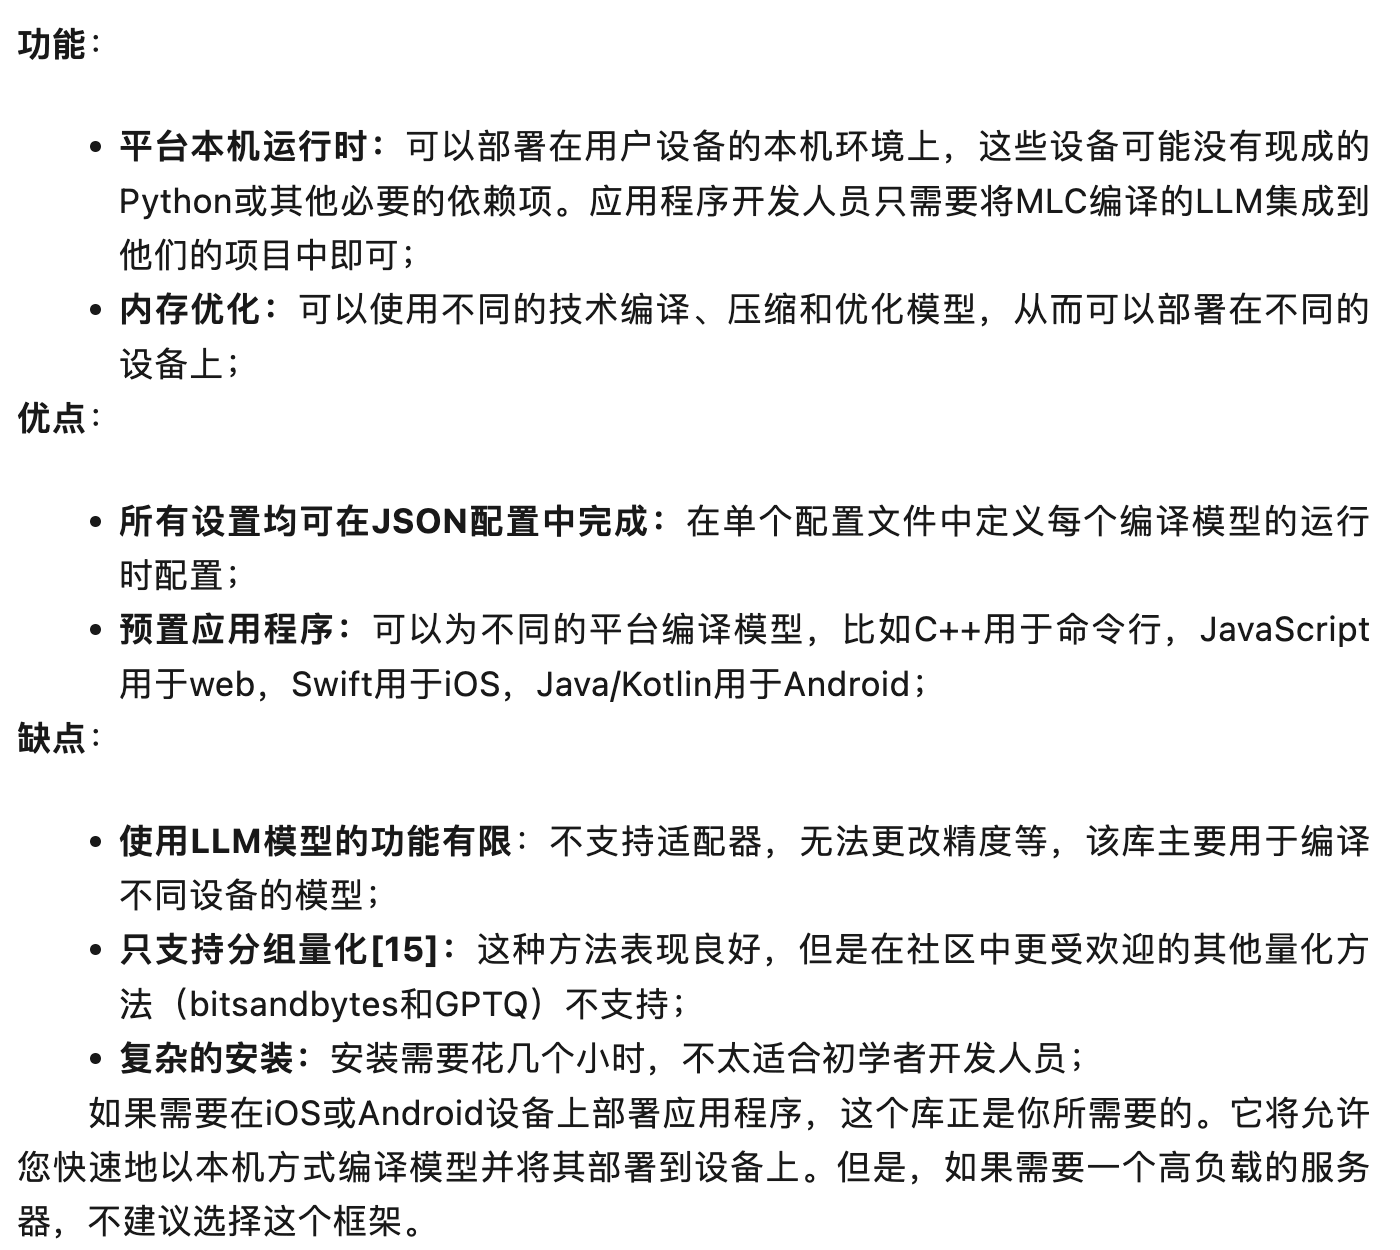